In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Extraction des données

In [27]:
fichiers_excel = []
for date in range(2012,2023):
    nom_fichier = f"data/dataset_{date}.xlsx"
    fichiers_excel.append(nom_fichier)

In [29]:
fichiers_excel.append('data/2023_today.xlsx')
fichiers_excel

['data/dataset_2012.xlsx',
 'data/dataset_2013.xlsx',
 'data/dataset_2014.xlsx',
 'data/dataset_2015.xlsx',
 'data/dataset_2016.xlsx',
 'data/dataset_2017.xlsx',
 'data/dataset_2018.xlsx',
 'data/dataset_2019.xlsx',
 'data/dataset_2020.xlsx',
 'data/dataset_2021.xlsx',
 'data/dataset_2022.xlsx',
 'data/2023_today.xlsx']

In [31]:
df_list = []
for fichier in fichiers_excel:
    df = pd.read_excel(fichier)
    df_list.append(df)

## Fusion Dataframes

In [33]:
def fusion_df(df_list):
    df = pd.DataFrame()
    for df_select in df_list:
        df1 = df_select
        df = pd.concat([df1, df], ignore_index=True)
    return df

In [34]:
df = fusion_df(df_list)
df.shape

(434892, 40)

In [35]:
df.head()

,PÈrimËtre,Nature,Date,Heures,Consommation,PrÈvision J-1,PrÈvision J,Fioul,Charbon,Gaz,NuclÈaire,Eolien,Solaire,Hydraulique,Pompage,BioÈnergies,Ech. physiques,Taux de Co2,Ech. comm. Angleterre,Ech. comm. Espagne,Ech. comm. Italie,Ech. comm. Suisse,Ech. comm. Allemagne-Belgique,Fioul - TAC,Fioul - CogÈn.,Fioul - Autres,Gaz - TAC,Gaz - CogÈn.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + ÈclusÈe,Hydraulique - Lacs,Hydraulique - STEP turbinage,BioÈnergies - DÈchets,BioÈnergies - Biomasse,BioÈnergies - Biogaz,Stockage batterie,DÈstockage batterie,Eolien terrestre,Eolien offshore
0,France,DonnÈes temps rÈel,2023-02-01,00:00:00,62429.0,63500,62600.0,203.0,55.0,4844.0,42351.0,6366.0,0.0,6634.0,-6.0,733.0,1249.0,43.0,3712.0,1850.0,-4242.0,-3688.0,3864.0,0.0,23.0,180.0,0,2391,2455.0,0.0,3938,2620,76.0,156,319.0,259.0,ND,ND,ND,ND
1,France,DonnÈes temps rÈel,2023-02-01,00:15:00,62131.0,62500,61900.0,222.0,56.0,5031.0,42422.0,6522.0,0.0,6410.0,-245.0,721.0,992.0,45.0,NaN,NaN,NaN,NaN,NaN,2.0,23.0,197.0,0,2386,2647.0,0.0,3656,2712,42.0,134,321.0,257.0,ND,ND,ND,ND
2,France,DonnÈes temps rÈel,2023-02-01,00:30:00,60993.0,61500,61200.0,221.0,54.0,4795.0,42240.0,6584.0,0.0,5912.0,-273.0,706.0,754.0,44.0,3712.0,1850.0,-4242.0,-3688.0,3904.0,1.0,23.0,197.0,0,2383,2413.0,0.0,3603,2280,29.0,136,319.0,257.0,ND,ND,ND,ND
3,France,DonnÈes temps rÈel,2023-02-01,00:45:00,59590.0,60750,60250.0,238.0,55.0,4542.0,42072.0,6693.0,0.0,5434.0,-1412.0,693.0,1275.0,43.0,NaN,NaN,NaN,NaN,NaN,0.0,23.0,215.0,0,2381,2163.0,0.0,3560,1845,29.0,128,319.0,257.0,ND,ND,ND,ND
4,France,DonnÈes temps rÈel,2023-02-01,01:00:00,59122.0,60000,59300.0,239.0,55.0,4351.0,42205.0,6588.0,0.0,5359.0,-1410.0,706.0,1029.0,42.0,4028.0,1850.0,-4242.0,-3700.0,3942.0,1.0,23.0,215.0,0,2382,1970.0,0.0,3498,1832,29.0,129,320.0,257.0,ND,ND,ND,ND


In [36]:
pd.set_option('display.max_column', 40)

<Axes: >

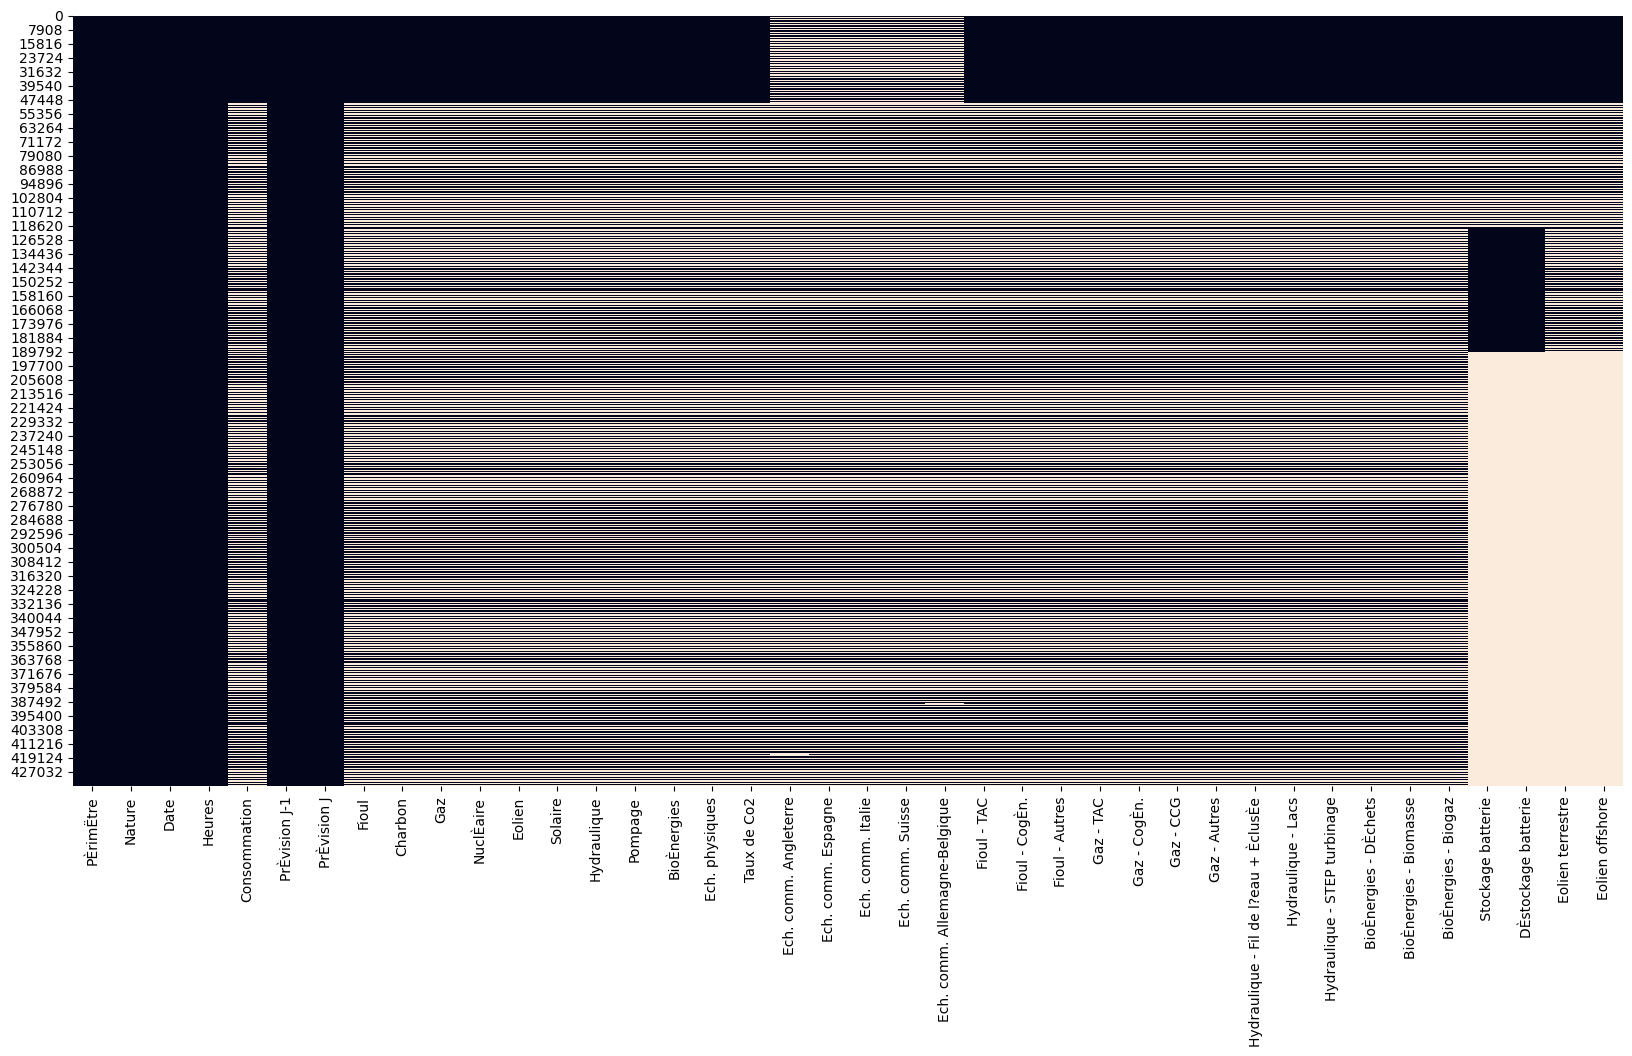

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [38]:
(df.isna().sum() / df.shape[0]).sort_values()

PÈrimËtre                               0.000000
Nature                                  0.000028
Date                                    0.000028
Heures                                  0.000028
PrÈvision J-1                           0.000028
PrÈvision J                             0.000469
BioÈnergies - DÈchets                   0.444016
Hydraulique - STEP turbinage            0.444016
Hydraulique - Lacs                      0.444016
Fioul - TAC                             0.444016
Gaz - TAC                               0.444016
Fioul - Autres                          0.444016
BioÈnergies - Biomasse                  0.444016
Gaz - CogÈn.                            0.444016
Gaz - CCG                               0.444016
Fioul - CogÈn.                          0.444016
BioÈnergies - Biogaz                    0.444016
BioÈnergies                             0.444016
Ech. physiques                          0.444016
Gaz - Autres                            0.444016
Pompage             

## Traitement 

In [40]:
df = df.dropna(subset=['Gaz'])

In [41]:
colonnes = ['Date', 'Fioul', 'Charbon', 'Gaz', 'NuclÈaire' , 'Solaire', 'Eolien', 'Hydraulique', 'Production', 'Consommation']
df_final = pd.DataFrame(columns=colonnes)

In [42]:
df_final

,Date,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation


In [43]:
def filtre(df):
    colonnes_a_conserver = df.select_dtypes(include=['float64']).columns.tolist()
    colonnes_a_conserver.append('Date')
    df_conserve = df[colonnes_a_conserver]
    return df_conserve

In [44]:
df = filtre(df)
print(df.dtypes)

Consommation             float64
PrÈvision J              float64
Fioul                    float64
Charbon                  float64
Gaz                      float64
NuclÈaire                float64
Eolien                   float64
Solaire                  float64
Hydraulique              float64
Pompage                  float64
BioÈnergies              float64
Ech. physiques           float64
Taux de Co2              float64
Date              datetime64[ns]
dtype: object


### Fusion des données dans une seul dataframe

In [45]:
for df_select in df_list:
    tmp = filtre(df_select)
    moyenne_par_groupe = tmp.groupby('Date').mean().reset_index()
    df_final = pd.concat([df_final, moyenne_par_groupe], ignore_index=True)

In [46]:
df_final

,Date,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation,PrÈvision J-1,PrÈvision J,Pompage,BioÈnergies,Ech. physiques,Taux de Co2,Fioul - TAC,Fioul - CogÈn.,Fioul - Autres,Gaz - TAC,Gaz - CogÈn.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + ÈclusÈe,Hydraulique - Lacs,Hydraulique - STEP turbinage,BioÈnergies - DÈchets,BioÈnergies - Biomasse,BioÈnergies - Biogaz,Ech. comm. Angleterre,Ech. comm. Espagne,Ech. comm. Italie,Ech. comm. Suisse,Ech. comm. Allemagne-Belgique,Stockage batterie,DÈstockage batterie,Eolien terrestre,Eolien offshore
0,2012-01-01,492.687500,15.791667,3787.041667,44861.375000,130.312500,3926.229167,7655.666667,NaN,51491.500000,51060.937500,50427.604167,-1808.770833,696.062500,-8264.750000,37.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,491.625000,7.875000,4050.083333,53273.145833,88.895833,3069.854167,8590.916667,NaN,60683.645833,60379.687500,59781.770833,-1053.562500,650.395833,-8485.791667,33.687500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-03,514.583333,4.270833,4028.666667,58216.250000,141.000000,4761.854167,10094.979167,NaN,67762.104167,66141.145833,66589.062500,-1017.708333,664.333333,-9646.375000,29.895833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-04,546.000000,0.145833,3713.208333,57653.062500,180.312500,4237.333333,10212.354167,NaN,68029.229167,67244.270833,66988.541667,-878.958333,682.020833,-8316.291667,29.270833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-05,537.687500,0.333333,4247.062500,56509.708333,66.812500,5199.250000,10764.062500,NaN,69157.395833,66772.395833,67546.875000,-835.104167,687.312500,-8019.833333,31.520833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,2024-06-22,141.187500,0.000000,473.000000,33228.510417,2972.666667,4400.645833,8224.927083,NaN,37931.864583,NaN,37989.062500,-1044.875000,797.614583,-11254.343750,14.104167,19.187500,122.0,0.0,NaN,NaN,155.968750,0.0,NaN,NaN,768.447917,NaN,352.114583,244.0,-4000.833333,303.333333,-1858.375000,-1107.333333,-4806.875000,NaN,NaN,NaN,NaN
4526,2024-06-23,123.583333,0.000000,430.708333,33260.062500,3478.916667,2009.760417,8194.656250,NaN,36675.572917,NaN,36609.375000,-1050.854167,788.447917,-10535.729167,13.895833,1.583333,122.0,0.0,NaN,NaN,114.781250,0.0,NaN,NaN,770.093750,NaN,352.177083,244.0,-3967.625000,1259.250000,-1637.375000,-561.000000,-5415.041667,NaN,NaN,NaN,NaN
4527,2024-06-24,123.692308,0.000000,434.738462,38162.815385,5726.015385,2387.446154,8293.153846,NaN,41521.415385,NaN,42912.500000,-740.707692,787.446154,-13646.523077,12.061538,1.692308,122.0,0.0,NaN,NaN,118.846154,0.0,NaN,NaN,711.876923,NaN,354.246154,244.0,-3970.958333,512.791667,-2520.041667,-1067.687500,-5975.812500,NaN,NaN,NaN,NaN
4528,2024-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Suppression des colonnes inutiles

In [47]:
df_final = df_final[colonnes]
df_final

,Date,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation
0,2012-01-01,492.687500,15.791667,3787.041667,44861.375000,130.312500,3926.229167,7655.666667,NaN,51491.500000
1,2012-01-02,491.625000,7.875000,4050.083333,53273.145833,88.895833,3069.854167,8590.916667,NaN,60683.645833
2,2012-01-03,514.583333,4.270833,4028.666667,58216.250000,141.000000,4761.854167,10094.979167,NaN,67762.104167
3,2012-01-04,546.000000,0.145833,3713.208333,57653.062500,180.312500,4237.333333,10212.354167,NaN,68029.229167
4,2012-01-05,537.687500,0.333333,4247.062500,56509.708333,66.812500,5199.250000,10764.062500,NaN,69157.395833
...,...,...,...,...,...,...,...,...,...,...
4525,2024-06-22,141.187500,0.000000,473.000000,33228.510417,2972.666667,4400.645833,8224.927083,NaN,37931.864583
4526,2024-06-23,123.583333,0.000000,430.708333,33260.062500,3478.916667,2009.760417,8194.656250,NaN,36675.572917
4527,2024-06-24,123.692308,0.000000,434.738462,38162.815385,5726.015385,2387.446154,8293.153846,NaN,41521.415385
4528,2024-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Changement d'index

In [48]:
df_final.set_index('Date', inplace=True)

In [49]:
df_final.head()

,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation
Date,,,,,,,,,
2012-01-01,492.687500,15.791667,3787.041667,44861.375000,130.312500,3926.229167,7655.666667,NaN,51491.500000
2012-01-02,491.625000,7.875000,4050.083333,53273.145833,88.895833,3069.854167,8590.916667,NaN,60683.645833
2012-01-03,514.583333,4.270833,4028.666667,58216.250000,141.000000,4761.854167,10094.979167,NaN,67762.104167
2012-01-04,546.000000,0.145833,3713.208333,57653.062500,180.312500,4237.333333,10212.354167,NaN,68029.229167
2012-01-05,537.687500,0.333333,4247.062500,56509.708333,66.812500,5199.250000,10764.062500,NaN,69157.395833


### Calcul de la Production

In [50]:
colonnes_production = ['Fioul', 'Charbon', 'Gaz', 'NuclÈaire' , 'Solaire', 'Eolien', 'Hydraulique', 'Production']
df_final.loc[:, 'Production'] = df_final[colonnes_production].sum(axis=1)
df_final

,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation
Date,,,,,,,,,
2012-01-01,492.687500,15.791667,3787.041667,44861.375000,130.312500,3926.229167,7655.666667,60869.104167,51491.500000
2012-01-02,491.625000,7.875000,4050.083333,53273.145833,88.895833,3069.854167,8590.916667,69572.395833,60683.645833
2012-01-03,514.583333,4.270833,4028.666667,58216.250000,141.000000,4761.854167,10094.979167,77761.604167,67762.104167
2012-01-04,546.000000,0.145833,3713.208333,57653.062500,180.312500,4237.333333,10212.354167,76542.416667,68029.229167
2012-01-05,537.687500,0.333333,4247.062500,56509.708333,66.812500,5199.250000,10764.062500,77324.916667,69157.395833
...,...,...,...,...,...,...,...,...,...
2024-06-22,141.187500,0.000000,473.000000,33228.510417,2972.666667,4400.645833,8224.927083,49440.9375,37931.864583
2024-06-23,123.583333,0.000000,430.708333,33260.062500,3478.916667,2009.760417,8194.656250,47497.6875,36675.572917
2024-06-24,123.692308,0.000000,434.738462,38162.815385,5726.015385,2387.446154,8293.153846,55127.861538,41521.415385


### Supression des lignes inutiles

In [51]:
df_final = df_final.dropna()

In [52]:
df_final

,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation
Date,,,,,,,,,
2012-01-01,492.687500,15.791667,3787.041667,44861.375000,130.312500,3926.229167,7655.666667,60869.104167,51491.500000
2012-01-02,491.625000,7.875000,4050.083333,53273.145833,88.895833,3069.854167,8590.916667,69572.395833,60683.645833
2012-01-03,514.583333,4.270833,4028.666667,58216.250000,141.000000,4761.854167,10094.979167,77761.604167,67762.104167
2012-01-04,546.000000,0.145833,3713.208333,57653.062500,180.312500,4237.333333,10212.354167,76542.416667,68029.229167
2012-01-05,537.687500,0.333333,4247.062500,56509.708333,66.812500,5199.250000,10764.062500,77324.916667,69157.395833
...,...,...,...,...,...,...,...,...,...
2024-06-20,123.833333,0.000000,1083.270833,38537.687500,2214.302083,3326.479167,8886.812500,54172.385417,43895.416667
2024-06-21,127.989583,0.000000,1325.916667,38392.177083,3535.583333,3252.989583,8642.156250,55276.8125,42816.395833
2024-06-22,141.187500,0.000000,473.000000,33228.510417,2972.666667,4400.645833,8224.927083,49440.9375,37931.864583


### Division du dataframe pour travailler sur les données de 01/2012-05/2024

In [53]:
date_limit = pd.Timestamp('2024-05-31')
df_06_2024 = df_final[df_final.index > date_limit]
df_final = df_final[df_final.index <= date_limit]

In [54]:
df_06_2024

,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation
Date,,,,,,,,,
2024-06-01,124.052083,0.0,429.375000,32622.218750,2637.770833,5736.031250,8607.427083,50156.875,39119.822917
2024-06-02,265.989583,0.0,449.145833,32381.479167,2392.197917,4621.427083,8119.093750,48229.333333,37930.687500
2024-06-03,398.458333,0.0,471.812500,38546.531250,4403.270833,2135.958333,8946.822917,54902.854167,43150.531250
2024-06-04,207.718750,0.0,467.343750,38102.614583,4648.885417,2134.416667,9326.250000,54887.229167,42921.427083
2024-06-05,115.156250,0.0,485.406250,37753.822917,4441.468750,2182.937500,9095.302083,54074.09375,42849.552083
2024-06-06,169.885417,0.0,476.541667,39420.625000,4615.718750,1733.447917,9286.781250,55703.0,43108.062500
2024-06-07,178.750000,0.0,522.666667,39701.291667,4142.468750,1605.562500,9705.510417,55856.25,42533.718750
2024-06-08,165.062500,0.0,451.135417,34001.114583,2941.364583,2295.114583,8787.031250,48640.822917,37949.281250
2024-06-09,123.729167,0.0,437.020833,30279.239583,2755.906250,3119.666667,8114.552083,44830.114583,36439.833333


## Visualisation

In [56]:
#df_06_2024.to_csv("06_2024.csv", index=True)

In [80]:
#df_final.to_csv

### Groupement par mois des moyenne de production

In [110]:
# Groupement par mois et calcul de la moyenne mensuelle
df_moyenne_mensuelle = df_final.groupby(pd.Grouper(freq='M')).mean()
# Extraire les mois de l'index pour regrouper par mois indépendamment de l'année
df_moyenne_mensuelle['Mois'] = df_moyenne_mensuelle.index.month
# Calculer la moyenne annuelle pour chaque mois
df_moyenne_annuelle_par_mois = df_moyenne_mensuelle.groupby('Mois').mean()
df_moyenne_annuelle_par_mois

,Fioul,Charbon,Gaz,NuclÈaire,Solaire,Eolien,Hydraulique,Production,Consommation
Mois,,,,,,,,,
1,367.012041,1223.468974,5504.899222,53766.265653,506.549087,4011.452117,8539.924815,73919.571909,69003.113155
2,412.588013,1298.849405,5454.743405,50390.476692,883.017603,4723.123275,8538.802632,71701.601025,66587.392675
3,307.683752,954.999612,4426.271014,44918.138751,1239.081110,4094.032594,8029.216527,63969.423361,58602.473067
4,225.815385,663.336191,2124.397169,40508.531357,1589.076362,3186.586512,7471.503072,55769.246047,50692.106811
5,191.525124,292.053815,1417.220533,38192.257263,1765.330981,2781.621200,8712.104890,53352.113808,45219.023961
6,196.044444,307.003848,1738.361516,37172.814959,1775.852517,2027.782841,8363.646267,51581.506395,44700.964873
7,199.216650,481.563172,2144.356267,37548.544383,1833.205365,2138.527330,6472.072245,50817.485411,45092.879144
8,167.272513,410.257420,1903.725526,36459.001540,1719.380012,2045.618252,5148.385697,47853.640961,42131.977963
9,193.851852,797.090451,2448.296817,38362.491377,1479.730816,2270.077373,4546.261979,50097.800666,45081.365249


### Moyenne des productions des différentes technologie

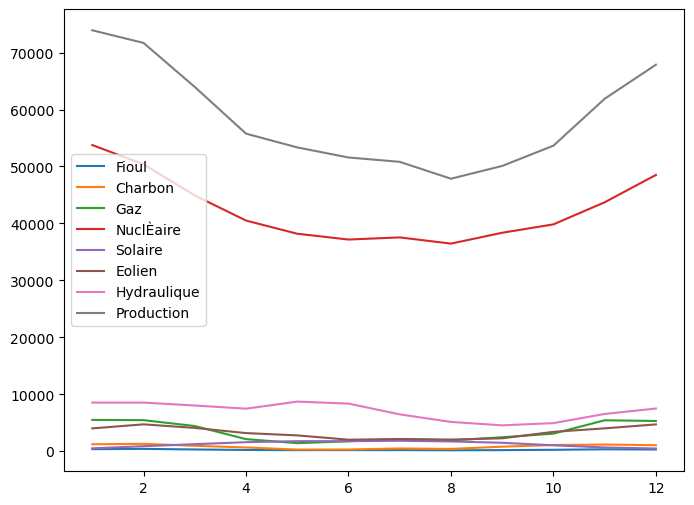

In [146]:
plt.figure(figsize=(8,6))
for prod in colonnes_production:
    plt.plot(df_moyenne_annuelle_par_mois.index, df_moyenne_annuelle_par_mois[prod], label=prod)
plt.legend()
plt.show()

### Moyenne des Consommations / Productions

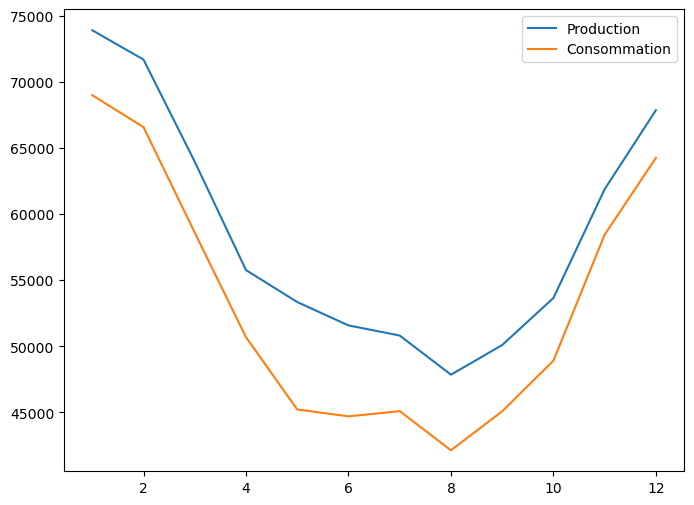

In [152]:
plt.figure(figsize=(8,6))
for prod in ['Production', 'Consommation']:
    plt.plot(df_moyenne_annuelle_par_mois.index, df_moyenne_annuelle_par_mois[prod], label=prod)
plt.legend()
plt.show()

## Prediction

In [156]:
df_pred = df_final.copy()